In [0]:
pip install soundfile

In [0]:
import pandas as pd
import numpy as np
import math

import librosa as lb # https://librosa.github.io/librosa/
import soundfile as sf # https://pysoundfile.readthedocs.io/en/latest/

import os

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [0]:
diag_csv = 'gdrive/My Drive/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv'
diagnosis = pd.read_csv(diag_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [0]:
ds = diagnosis['diagnosis'].unique()
ds

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [0]:
audio_text_loc = 'gdrive/My Drive/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path = audio_text_loc) if '.txt' in s]
files

['186_2b4_Tc_mc_AKGC417L',
 '186_3b3_Al_mc_AKGC417L',
 '186_3b3_Pl_mc_AKGC417L',
 '186_3b3_Lr_mc_AKGC417L',
 '186_3b3_Pr_mc_AKGC417L',
 '189_1b2_Lr_mc_LittC2SE',
 '191_2b1_Pl_mc_LittC2SE',
 '190_1b1_Tc_sc_Meditron',
 '186_3b3_Tc_mc_AKGC417L',
 '188_1b1_Al_sc_Meditron',
 '188_1b1_Pl_sc_Meditron',
 '188_1b1_Tc_sc_Meditron',
 '188_1b1_Ar_sc_Meditron',
 '187_1b1_Ll_sc_Meditron',
 '191_2b1_Pr_mc_LittC2SE',
 '192_2b1_Ar_mc_LittC2SE',
 '191_2b2_Tc_mc_LittC2SE',
 '192_2b1_Al_mc_LittC2SE',
 '192_2b2_Ar_mc_LittC2SE',
 '192_2b3_Al_mc_LittC2SE',
 '193_1b2_Al_mc_AKGC417L',
 '192_2b2_Al_mc_LittC2SE',
 '193_1b2_Ar_mc_AKGC417L',
 '192_2b3_Ar_mc_LittC2SE',
 '193_1b2_Ll_mc_AKGC417L',
 '193_1b2_Tc_mc_AKGC417L',
 '193_1b2_Pl_mc_AKGC417L',
 '193_1b2_Pr_mc_AKGC417L',
 '193_7b3_Ar_mc_AKGC417L',
 '193_7b3_Lr_mc_AKGC417L',
 '193_1b4_Lr_mc_AKGC417L',
 '193_7b3_Pl_mc_AKGC417L',
 '193_7b3_Al_mc_AKGC417L',
 '193_7b3_Ll_mc_AKGC417L',
 '193_7b3_Pr_mc_AKGC417L',
 '193_7b3_Tc_mc_AKGC417L',
 '194_1b1_Lr_sc_Meditron',
 

In [0]:
def tokenize_file(filename):
    return filename.split('_')

In [0]:
files_ = []
for f in files:
    df = pd.read_csv(audio_text_loc + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    #get filename features
    f_features = tokenize_file(f)
    df['pId'] = f_features[0]
    df['ac_mode'] = f_features[3]
    
    files_.append(df)
    
files_df = pd.concat(files_)
files_df.reset_index()
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode
0,1.185,5.268,0,0,186_2b4_Tc_mc_AKGC417L,186,mc
1,5.268,9.292,0,0,186_2b4_Tc_mc_AKGC417L,186,mc
2,9.292,13.435,0,0,186_2b4_Tc_mc_AKGC417L,186,mc
3,13.435,17.899,0,0,186_2b4_Tc_mc_AKGC417L,186,mc
4,17.899,19.506,0,0,186_2b4_Tc_mc_AKGC417L,186,mc


In [0]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   object 
 6   ac_mode   6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [0]:
diagnosis.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pId        126 non-null    int64 
 1   diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [0]:
files_df['pId'] = files_df['pId'].astype('float64')
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   float64
 6   ac_mode   6898 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 431.1+ KB


In [0]:
files_df = pd.merge(files_df, diagnosis, on='pId')
files_df.head()


,start,end,crackles,wheezes,filename,pId,ac_mode,diagnosis
0,1.185,5.268,0,0,186_2b4_Tc_mc_AKGC417L,186.0,mc,COPD
1,5.268,9.292,0,0,186_2b4_Tc_mc_AKGC417L,186.0,mc,COPD
2,9.292,13.435,0,0,186_2b4_Tc_mc_AKGC417L,186.0,mc,COPD
3,13.435,17.899,0,0,186_2b4_Tc_mc_AKGC417L,186.0,mc,COPD
4,17.899,19.506,0,0,186_2b4_Tc_mc_AKGC417L,186.0,mc,COPD


In [0]:
#code taken from eatmygoose https://www.kaggle.com/eatmygoose/cnn-detection-of-wheezes-and-crackles
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [0]:
files_df['len_per_slice'] = files_df['end'].sub(files_df['start'], axis = 0) 
max_len_per_slice = max(files_df['len_per_slice'])
max_len_per_slice

16.163

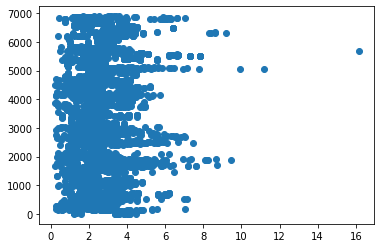

In [0]:
plt.scatter(files_df['len_per_slice'], y=files_df.index)

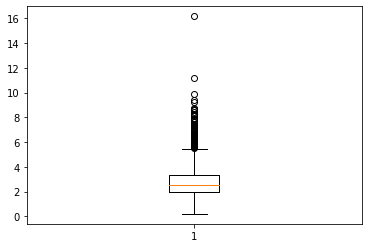

In [0]:
box = plt.boxplot(files_df['len_per_slice'])

In [0]:
force_max_len = math.ceil(boxplot_stats(files_df['len_per_slice'])[0]['whishi'])
force_max_len

6

In [0]:
def compute_len(samp_rate=22050, time=force_max_len, acquisition_mode=0):
    '''Computes the supposed length of sliced data
        samp_size = sample size from the data
        samp_rate = sampling rate. by default since we're working on 24-bit files, we'll use 96kHz
        time = length of time for the audio file. by default we'll use the max we have which is 5.48
        acquisition_mode = either mono or stereo. 0 for mono, 1 for stereo
    '''
    comp_len = 0
    if acquisition_mode == 1: #ac mode is single channel which means it's 'mono'
        comp_len = samp_rate * time
    else: #stereo
        comp_len = (samp_rate * time) * 2

    return comp_len

In [0]:
#create output path
os.makedirs('output')

FileExistsError: ignored

In [0]:
for d in ds:
    path = os.path.join('output', d)
    os.makedirs(path)

FileExistsError: ignored

In [0]:
print (path)
dirlist=os.listdir("output")

output/URTI


In [0]:
!ls

gdrive	output	sample_data


In [0]:
i = 0 #iterator for file naming

for idx, row in files_df.iterrows():
    filename = row['filename']
    start = row['start']
    end = row['end']
    diag = row['diagnosis']
    
    #check len and force to 6 sec if more than that
    if force_max_len < end - start:
        end = start + force_max_len
    
    aud_loc = audio_text_loc + '/' + f + '.wav'
    
    if idx != 0:
        if files_df.iloc[idx-1]['filename'] == filename:
            i=i+1
        else:
            i=0
    n_filename = filename + '_' + str(i) + '.wav'
    path = 'output/' + diag + '/' + n_filename
    
    print('processing ' + n_filename + '...')

    data, samplingrate = lb.load(aud_loc)
    sliced_data = slice_data(start=start, end=end, raw_data=data, sample_rate=samplingrate)
    
    #pad audio if < forced_max_len
    a_len = compute_len(samp_rate=samplingrate, acquisition_mode=row['ac_mode']=='sc')
    padded_data = lb.util.pad_center(sliced_data, a_len)

    sf.write(file=path, data=padded_data, samplerate=samplingrate)

Streaming output truncated to the last 5000 lines.
processing 213_2p2_Pl_mc_AKGC417L_5.wav...
processing 213_2p2_Pl_mc_AKGC417L_6.wav...
processing 213_2p2_Pr_mc_AKGC417L_0.wav...
processing 213_2p2_Pr_mc_AKGC417L_1.wav...
processing 213_2p2_Pr_mc_AKGC417L_2.wav...
processing 213_2p2_Pr_mc_AKGC417L_3.wav...
processing 213_2p2_Pr_mc_AKGC417L_4.wav...
processing 213_2p2_Pr_mc_AKGC417L_5.wav...
processing 213_2p2_Pr_mc_AKGC417L_6.wav...
processing 216_1b1_Pl_sc_Meditron_0.wav...
processing 216_1b1_Pl_sc_Meditron_1.wav...
processing 216_1b1_Pl_sc_Meditron_2.wav...
processing 216_1b1_Pl_sc_Meditron_3.wav...
processing 216_1b1_Pl_sc_Meditron_4.wav...
processing 216_1b1_Pl_sc_Meditron_5.wav...
processing 216_1b1_Pl_sc_Meditron_6.wav...
processing 216_1b1_Pl_sc_Meditron_7.wav...
processing 216_1b1_Pl_sc_Meditron_8.wav...
processing 216_1b1_Pl_sc_Meditron_9.wav...
processing 216_1b1_Al_sc_Meditron_0.wav...
processing 216_1b1_Al_sc_Meditron_1.wav...
processing 216_1b1_Al_sc_Meditron_2.wav...
pro

In [0]:
ls'output'

Asthma/          Bronchiolitis/  Healthy/  Pneumonia/
Bronchiectasis/  COPD/           LRTI/     URTI/


In [0]:
!pip install split_folders

In [0]:
import split_folders

import os

In [0]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')

FileExistsError: ignored

In [0]:
audio_loc = 'output/'

split_folders.ratio(audio_loc, output='output', seed=1337, ratio=(0.8, 0.2))

Copying files: 6898 files [00:22, 300.77 files/s]


In [0]:
!ls 'output'

Asthma		Bronchiolitis  Healthy	Pneumonia  URTI
Bronchiectasis	COPD	       LRTI	train	   val


In [0]:
import librosa as lb
from librosa.display import specshow

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

import pandas as pd

In [0]:
files_loc = 'output/'

In [0]:
diagnosis_csv = 'gdrive/My Drive/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv'
diagnosis = pd.read_csv(diagnosis_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [0]:
categories = diagnosis['diagnosis'].unique()
categories

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [0]:
def is_wav(filename):
    '''
        Checks if files are .wav files
        Utility tool in converting wav to png files
    '''
    return filename.split('.')[-1] == 'wav'

In [0]:
def convert_to_spec_image(file_loc, filename, category, is_train=False, verbose=False):
    ''' 
        Converts audio file to spec image
        Input file includes path
        Saves the file to a png image in the save_directory
    '''
    train_ = 'train/'
    val_ = 'val/'
    
    loc = file_loc + train_ + category + '/' + filename
    if is_train == False:
        loc = file_loc + val_ + category + '/' + filename

    if verbose == True:
        print('reading and converting ' + filename + '...')
        
    y, sr = lb.load(loc)

    #Plot signal in
    plt.figure(figsize=(10,3))
    src_ft = lb.stft(y)
    src_db = lb.amplitude_to_db(abs(src_ft))
    specshow(src_db, sr=sr, x_axis='time', y_axis='hz')  
    plt.ylim(0, 5000)
    
    save_directory = 'output/'
    filename_img = filename.split('.wav')[0]
    
    save_loc = save_directory + train_ + category + '/' + filename_img + '.png'
    if is_train == False:
        save_loc = save_directory + val_ + category + '/' + filename_img + '.png'
        
    plt.savefig(save_loc)
    
    if verbose == True:
        print(filename + ' converted!')
        
    plt.close()

In [0]:
split = ['train', 'val']

for s in split:
    for cat in categories:
        print('-' * 100)
        print('working on ' + cat + '...')
        print('-' * 100)

        files = [f for f in listdir(files_loc + s + '/' + cat + '/') if isfile(join(files_loc + s + '/' + cat + '/', f)) and is_wav(f)]
        for f in files:
            convert_to_spec_image(file_loc = files_loc, category=cat, filename=f, is_train=(s == 'train'), verbose=True)
            

NameError: ignored

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [0]:
train_loc = 'output/train/'
test_loc = 'output/val/'

In [0]:
ls'output/train/Asthma'

103_2b2_Ar_mc_LittC2SE_0.png  103_2b2_Ar_mc_LittC2SE_2.png
103_2b2_Ar_mc_LittC2SE_0.wav  103_2b2_Ar_mc_LittC2SE_2.wav
103_2b2_Ar_mc_LittC2SE_1.png  103_2b2_Ar_mc_LittC2SE_3.png
103_2b2_Ar_mc_LittC2SE_1.wav  103_2b2_Ar_mc_LittC2SE_3.wav


In [0]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 1061 images belonging to 8 classes.
Found 0 images belonging to 8 classes.


In [0]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
x  = vgg16.get_layer('fc2').output
prediction = Dense(8, activation='softmax', name='predictions')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

In [0]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)  

Layer 'block1_pool' is trainable
Layer 'block2_conv1' is trainable
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten' is trainable
Layer 'fc1' is trainable
Layer 'fc2' is trainable
Layer 'predictions' is trainable


In [0]:
opt = Adam(lr=0.000001)
model.compile(optimizer=opt, loss=categorical_crossentropy, 
              metrics=['accuracy', 'mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
checkpoint = ModelCheckpoint("vgg16_base_res.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [0]:
counter = 4#Counter(traindata.classes)                       
max_val = 3#float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in range(0,4)}#counter.items()}
class_weights

TypeError: ignored

In [0]:
hist = model.fit(traindata, steps_per_epoch=traindata.samples//traindata.batch_size, validation_data=testdata, validation_steps=testdata.samples//testdata.batch_size, 
                 epochs=11,callbacks=[checkpoint,early])

Epoch 1/11
33/33 [==============================] - 7s 206ms/step - loss: 1.1410 - accuracy: 0.5569 - mae: 0.1373
Epoch 2/11
33/33 [==============================] - 6s 180ms/step - loss: 0.5598 - accuracy: 0.7221 - mae: 0.0831
Epoch 3/11
33/33 [==============================] - 6s 177ms/step - loss: 0.5391 - accuracy: 0.7464 - mae: 0.0774
Epoch 4/11
33/33 [==============================] - 6s 182ms/step - loss: 0.5230 - accuracy: 0.7491 - mae: 0.0758
Epoch 5/11
33/33 [==============================] - 6s 184ms/step - loss: 0.5003 - accuracy: 0.7502 - mae: 0.0747
Epoch 6/11
33/33 [==============================] - 6s 180ms/step - loss: 0.5052 - accuracy: 0.7512 - mae: 0.0743
Epoch 7/11
33/33 [==============================] - 6s 181ms/step - loss: 0.5064 - accuracy: 0.7590 - mae: 0.0736
Epoch 8/11
33/33 [==============================] - 6s 180ms/step - loss: 0.4999 - accuracy: 0.7434 - mae: 0.0734
Epoch 9/11
33/33 [==============================] - 6s 181ms/step - loss: 0.4867 - accur

KeyError: ignored

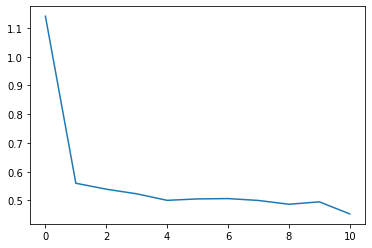

In [0]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.title('VGG16: Loss and Validation Loss (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.title('VGG16: Accuracy and Validation Accuracy (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(hist.history['mae'], label='train')
plt.plot(hist.history['val_mae'], label='val')
plt.title('VGG16: MAE and Validation MAE (0.000001 = Adam LR)')
plt.legend();
plt.show()

In [0]:
ls'output/train/Asthma'

103_2b2_Ar_mc_LittC2SE_0.png  103_2b2_Ar_mc_LittC2SE_2.png
103_2b2_Ar_mc_LittC2SE_0.wav  103_2b2_Ar_mc_LittC2SE_2.wav
103_2b2_Ar_mc_LittC2SE_1.png  103_2b2_Ar_mc_LittC2SE_3.png
103_2b2_Ar_mc_LittC2SE_1.wav  103_2b2_Ar_mc_LittC2SE_3.wav


In [0]:
img1='103_2b2_Ar_mc_LittC2SE_1.png'

In [0]:
from PIL import Image

In [0]:
image=Image.open('output/train/Asthma/103_2b2_Ar_mc_LittC2SE_1.png')

In [0]:
image=image.resize(224,224)

ValueError: ignored

In [0]:
image.show()

In [0]:
img1.show()

AttributeError: ignored